In [1]:
import pandas as pd 
import numpy as np 
from matplotlib import pyplot as plt 
import seaborn as sns

In [2]:
df=pd.read_csv(r"D:\me\daily task\Machine Learning\Dataset\Disease_symptom_and_patient_profile_dataset.csv")

In [3]:
df.head()

,Disease,Fever,Cough,Fatigue,Difficulty Breathing,Age,Gender,Blood Pressure,Cholesterol Level,Result
0,Influenza,Yes,No,Yes,Yes,19,Female,Low,Normal,Positive
1,Common Cold,No,Yes,Yes,No,25,Female,Normal,Normal,Negative
2,Eczema,No,Yes,Yes,No,25,Female,Normal,Normal,Negative
3,Asthma,Yes,Yes,No,Yes,25,Male,Normal,Normal,Positive
4,Asthma,Yes,Yes,No,Yes,25,Male,Normal,Normal,Positive


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 349 entries, 0 to 348
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Disease               349 non-null    object
 1   Fever                 349 non-null    object
 2   Cough                 349 non-null    object
 3   Fatigue               349 non-null    object
 4   Difficulty Breathing  349 non-null    object
 5   Age                   349 non-null    int64 
 6   Gender                349 non-null    object
 7   Blood Pressure        349 non-null    object
 8   Cholesterol Level     349 non-null    object
 9   Result                349 non-null    object
dtypes: int64(1), object(9)
memory usage: 27.4+ KB


In [5]:
cat=['senior citizen', 'adult', 'youngester', 'teen', 'child']
num=[100, 60, 30, 20, 10]
df["Age_cat"]=df["Age"].copy()
for ct,j in zip(cat,range(6)):
    df["Age_cat"]=np.where(df["Age"]<num[j],ct,df["Age_cat"])

In [6]:
df1=df.drop(columns=["Age"])

In [7]:
df1.rename(columns={"Age_cat":"Age"},inplace=True)

In [8]:
def OneHot(df1,var,cod):
    df1[var]=pd.get_dummies(df1[var]==cod,dtype=int,drop_first=True)
    return df1

In [9]:
one_hot=["Fever","Cough","Fatigue","Difficulty Breathing","Gender","Result"]

In [10]:
for col in one_hot:
    print(col)

Fever
Cough
Fatigue
Difficulty Breathing
Gender
Result


In [11]:
for col in one_hot:
    cod=df1[col].unique()[0]
    print(col," ",df1[col].unique())
    df1=OneHot(df1,col,cod)

Fever   ['Yes' 'No']
Cough   ['No' 'Yes']
Fatigue   ['Yes' 'No']
Difficulty Breathing   ['Yes' 'No']
Gender   ['Female' 'Male']
Result   ['Positive' 'Negative']


In [12]:
df1.head()

,Disease,Fever,Cough,Fatigue,Difficulty Breathing,Gender,Blood Pressure,Cholesterol Level,Result,Age
0,Influenza,1,1,1,1,1,Low,Normal,1,teen
1,Common Cold,0,0,1,0,1,Normal,Normal,0,youngester
2,Eczema,0,0,1,0,1,Normal,Normal,0,youngester
3,Asthma,1,0,0,1,0,Normal,Normal,1,youngester
4,Asthma,1,0,0,1,0,Normal,Normal,1,youngester


In [13]:
for disease,freq in df1["Disease"].value_counts().sort_values(ascending=False).to_dict().items():
    print(disease)

Asthma
Stroke
Osteoporosis
Hypertension
Diabetes
Migraine
Influenza
Pneumonia
Bronchitis
Hyperthyroidism
Hypothyroidism
Rheumatoid Arthritis
Gastroenteritis
Anxiety Disorders
Allergic Rhinitis
Eczema
Common Cold
Depression
Liver Cancer
Kidney Cancer
Osteoarthritis
Coronary Artery Disease
Kidney Disease
Ulcerative Colitis
Parkinson's Disease
Pancreatitis
Psoriasis
Multiple Sclerosis
Alzheimer's Disease
Urinary Tract Infection
Liver Disease
Crohn's Disease
Chronic Obstructive Pulmonary Disease (COPD)
Hepatitis
Tuberculosis
Lung Cancer
Urinary Tract Infection (UTI)
Cholera
Rubella
Ebola Virus
Malaria
Dengue Fever
Mumps
Klinefelter Syndrome
Lyme Disease
Rabies
Turner Syndrome
Tetanus
Zika Virus
HIV/AIDS
Hemophilia
Measles
Chickenpox
Typhoid Fever
Hepatitis B
Epilepsy
Chronic Obstructive Pulmonary...
Myocardial Infarction (Heart...
Brain Tumor
Cataracts
Hypertensive Heart Disease
Colorectal Cancer
Cerebral Palsy
Bipolar Disorder
Sinusitis
Muscular Dystrophy
Acne
Cystic Fibrosis
Sleep Apnea


In [14]:
mp={key:value for key,value in df1["Disease"].value_counts().sort_values(ascending=False).to_dict().items() if value > 1}

In [15]:
df1["Disease"]=df1["Disease"].map(mp)


In [16]:
df1["Disease"].fillna(1,inplace=True)

In [17]:
df1["Disease"].astype(int)
df1["Disease"].unique()

array([ 8.,  6., 23.,  7., 10.,  5., 16.,  2.,  3.,  1., 14.,  4.])

In [18]:
df1["Disease"]=pd.to_numeric(df1["Disease"],errors="coerce").astype(int)

In [19]:
df2=df1.select_dtypes(object)
df2.columns

Index(['Blood Pressure', 'Cholesterol Level', 'Age'], dtype='object')

In [20]:
for var in df1.select_dtypes(object):
    print(df1[var].unique())

['Low' 'Normal' 'High']
['Normal' 'Low' 'High']
['teen' 'youngester' 'adult' 'senior citizen']


In [21]:
dct={"Low":1,"Normal":2,"High":3}
df1["Blood Pressure"]=df1["Blood Pressure"].map(dct)
df1["Cholesterol Level"]=df1["Cholesterol Level"].map(dct)

In [22]:
dt={'teen':0, 'youngester':1, 'adult':2, 'senior citizen':3}
df1["Age"]=df1["Age"].map(dt)

In [23]:
df1.head()

,Disease,Fever,Cough,Fatigue,Difficulty Breathing,Gender,Blood Pressure,Cholesterol Level,Result,Age
0,8,1,1,1,1,1,1,2,1,0
1,6,0,0,1,0,1,2,2,0,1
2,6,0,0,1,0,1,2,2,0,1
3,23,1,0,0,1,0,2,2,1,1
4,23,1,0,0,1,0,2,2,1,1


In [26]:
import seaborn as sns
def Countplot(df1,var):
    sns.countplot(df1,x=var,palette="Reds",hue="Result")

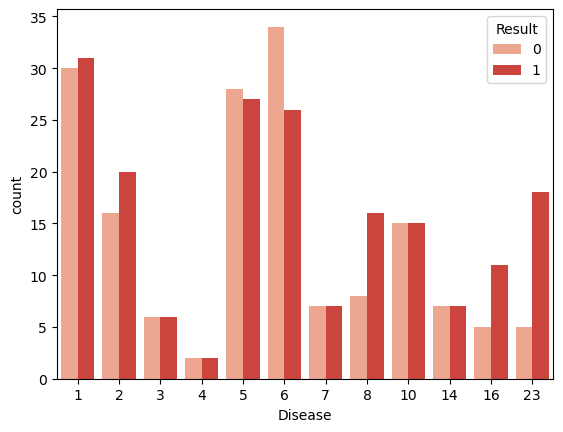

In [27]:
lst=["Disease","Fever","Cough","Fatigue","Difficulty Breathing","Gender","Blood Pressure","Cholesterol Level","Age"]
Countplot(df1,lst[0])

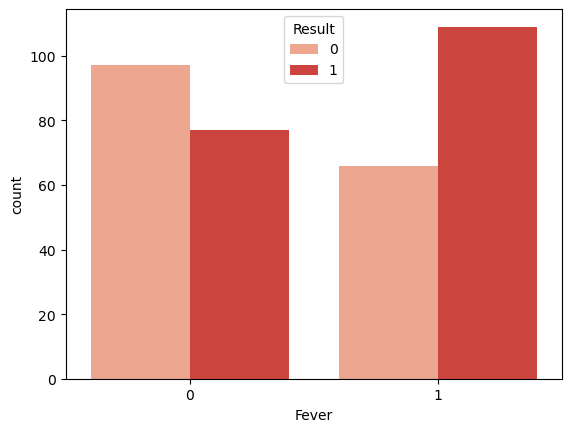

In [28]:
Countplot(df1,lst[1])

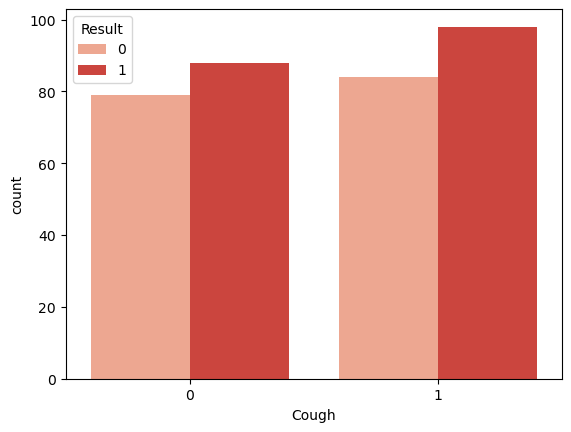

In [29]:
Countplot(df1,lst[2])

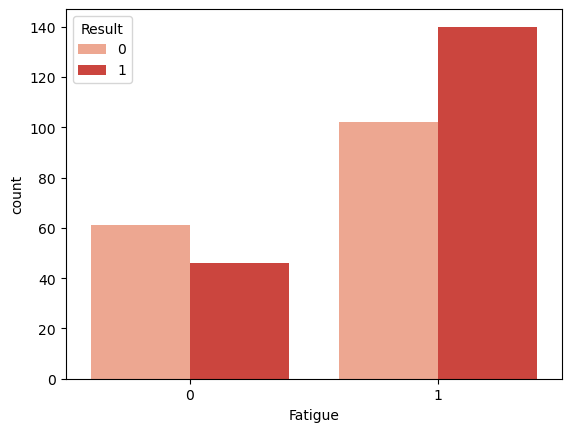

In [30]:
Countplot(df1,lst[3])

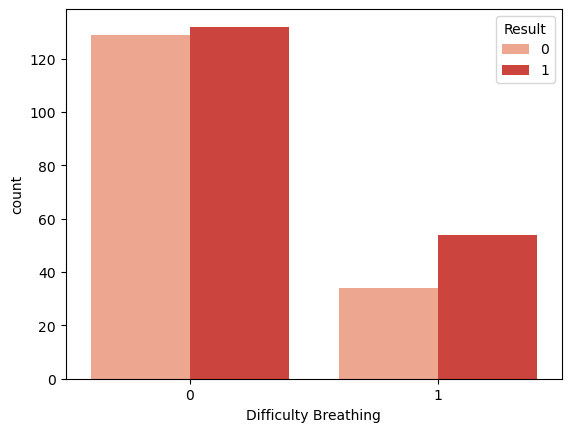

In [31]:
Countplot(df1,lst[4])

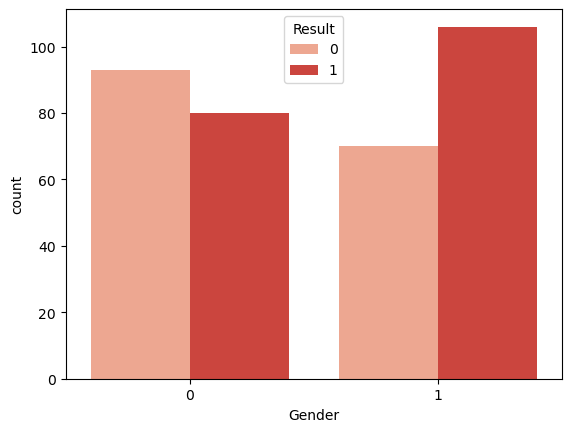

In [32]:
Countplot(df1,lst[5])

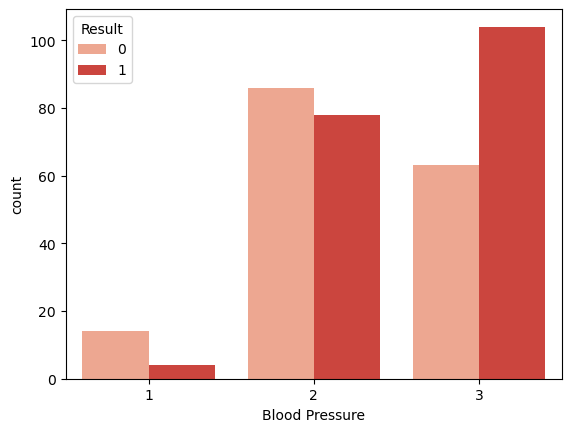

In [33]:
Countplot(df1,lst[6])

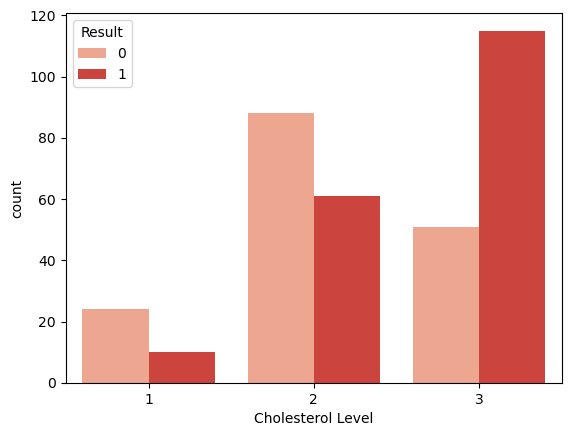

In [34]:
Countplot(df1,lst[7])

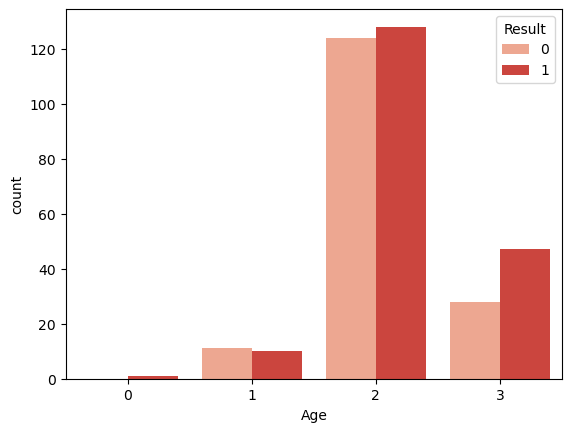

In [35]:
Countplot(df1,lst[8])

In [36]:
df1.columns

Index(['Disease', 'Fever', 'Cough', 'Fatigue', 'Difficulty Breathing',
       'Gender', 'Blood Pressure', 'Cholesterol Level', 'Result', 'Age'],
      dtype='object')

<Axes: xlabel='Result', ylabel='Fever'>

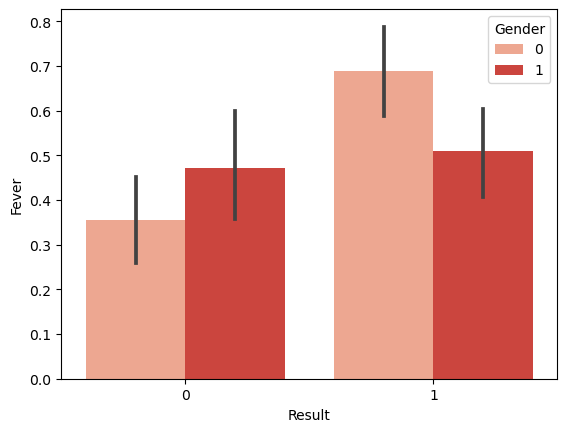

In [37]:
sns.barplot(data=df1,x="Result",y="Fever",hue="Gender",palette="Reds")

<Axes: xlabel='Cholesterol Level', ylabel='Result'>

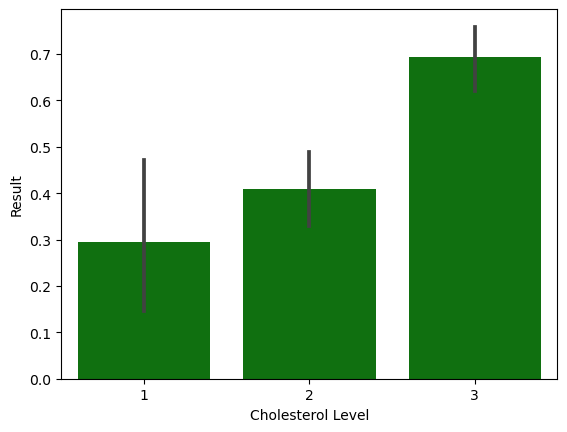

In [38]:
sns.barplot(data=df1,x="Cholesterol Level",y="Result",color="Green")

In [39]:
df2=df1.copy()
df2.head()

,Disease,Fever,Cough,Fatigue,Difficulty Breathing,Gender,Blood Pressure,Cholesterol Level,Result,Age
0,8,1,1,1,1,1,1,2,1,0
1,6,0,0,1,0,1,2,2,0,1
2,6,0,0,1,0,1,2,2,0,1
3,23,1,0,0,1,0,2,2,1,1
4,23,1,0,0,1,0,2,2,1,1


In [40]:
from sklearn.feature_selection import mutual_info_classif,f_classif
mutual_info_classif(df1[['Disease', 'Fever', 'Cough', 'Fatigue', 'Difficulty Breathing',
       'Gender', 'Blood Pressure', 'Cholesterol Level', 'Age']],df1["Result"])

array([0.        , 0.        , 0.01629709, 0.0084184 , 0.01956747,
       0.00989465, 0.00556828, 0.06507342, 0.02043445])

In [41]:
x=['Disease', 'Fever', 'Cough', 'Fatigue', 'Difficulty Breathing','Gender', 'Blood Pressure', 'Cholesterol Level', 'Age']
mutual_info_values=[0.        , 0.08024334, 0.04260588, 0.        , 0.        ,0.        , 0.05496725, 0.02803074, 0.        ]
result=[]
for val in zip(x,mutual_info_values):
    result.append(val)
result
three_tec=pd.DataFrame(result,columns=["X","mutual_info_values"])
three_tec

,X,mutual_info_values
0,Disease,0.000000
1,Fever,0.080243
2,Cough,0.042606
3,Fatigue,0.000000
4,Difficulty Breathing,0.000000
5,Gender,0.000000
6,Blood Pressure,0.054967
7,Cholesterol Level,0.028031
8,Age,0.000000


In [42]:
anova_fstat,anova_pval=f_classif(df1[['Disease', 'Fever', 'Cough', 'Fatigue', 'Difficulty Breathing',
       'Gender', 'Blood Pressure', 'Cholesterol Level', 'Age']],df1["Result"])
anova=[round(i,3) for i in anova_pval]
x=['Disease', 'Fever', 'Cough', 'Fatigue', 'Difficulty Breathing','Gender', 'Blood Pressure', 'Cholesterol Level', 'Age']
result=[]
for val in zip(x,anova):
    result.append(val)

result=pd.DataFrame(result,columns=["X","f_classif"])


In [43]:
three_tec=pd.merge(three_tec,result,on="X",how="inner")
three_tec

,X,mutual_info_values,f_classif
0,Disease,0.000000,0.017
1,Fever,0.080243,0.001
2,Cough,0.042606,0.830
3,Fatigue,0.000000,0.010
4,Difficulty Breathing,0.000000,0.080
5,Gender,0.000000,0.009
6,Blood Pressure,0.054967,0.000
7,Cholesterol Level,0.028031,0.000
8,Age,0.000000,0.129


In [44]:
from sklearn.feature_selection import chi2
chi2_statistic,chi2_pval=chi2(df1[['Disease', 'Fever', 'Cough', 'Fatigue', 'Difficulty Breathing',
       'Gender', 'Blood Pressure', 'Cholesterol Level', 'Age']],df1["Result"])
chisq=[round(i,3) for i in chi2_pval]
x=['Disease', 'Fever', 'Cough', 'Fatigue', 'Difficulty Breathing','Gender', 'Blood Pressure', 'Cholesterol Level', 'Age']
result=[]
for val in zip(x,chisq):
    result.append(val)

result=pd.DataFrame(result,columns=["X","chi2"])

In [101]:
del three_tec["chi2_x"]
three_tec.rename(columns={"chi2_y":"chi2"})

,X,mutual_info_values,f_classif,chi2
0,Disease,0.000000,0.017,0.000
1,Fever,0.080243,0.001,0.017
2,Cough,0.042606,0.830,0.882
3,Fatigue,0.000000,0.010,0.155
4,Difficulty Breathing,0.000000,0.080,0.129
5,Gender,0.000000,0.009,0.065
6,Blood Pressure,0.054967,0.000,0.156
7,Cholesterol Level,0.028031,0.000,0.016
8,Age,0.000000,0.129,0.594


In [103]:
del three_tec["chi2_y"]

In [104]:
three_tec=pd.merge(three_tec,result,on="X",how="inner")
three_tec

,X,mutual_info_values,f_classif,chi2
0,Disease,0.000000,0.017,0.000
1,Fever,0.080243,0.001,0.017
2,Cough,0.042606,0.830,0.882
3,Fatigue,0.000000,0.010,0.155
4,Difficulty Breathing,0.000000,0.080,0.129
5,Gender,0.000000,0.009,0.065
6,Blood Pressure,0.054967,0.000,0.156
7,Cholesterol Level,0.028031,0.000,0.016
8,Age,0.000000,0.129,0.594


<Axes: xlabel='X', ylabel='chi2'>

<Figure size 1800x2000 with 0 Axes>

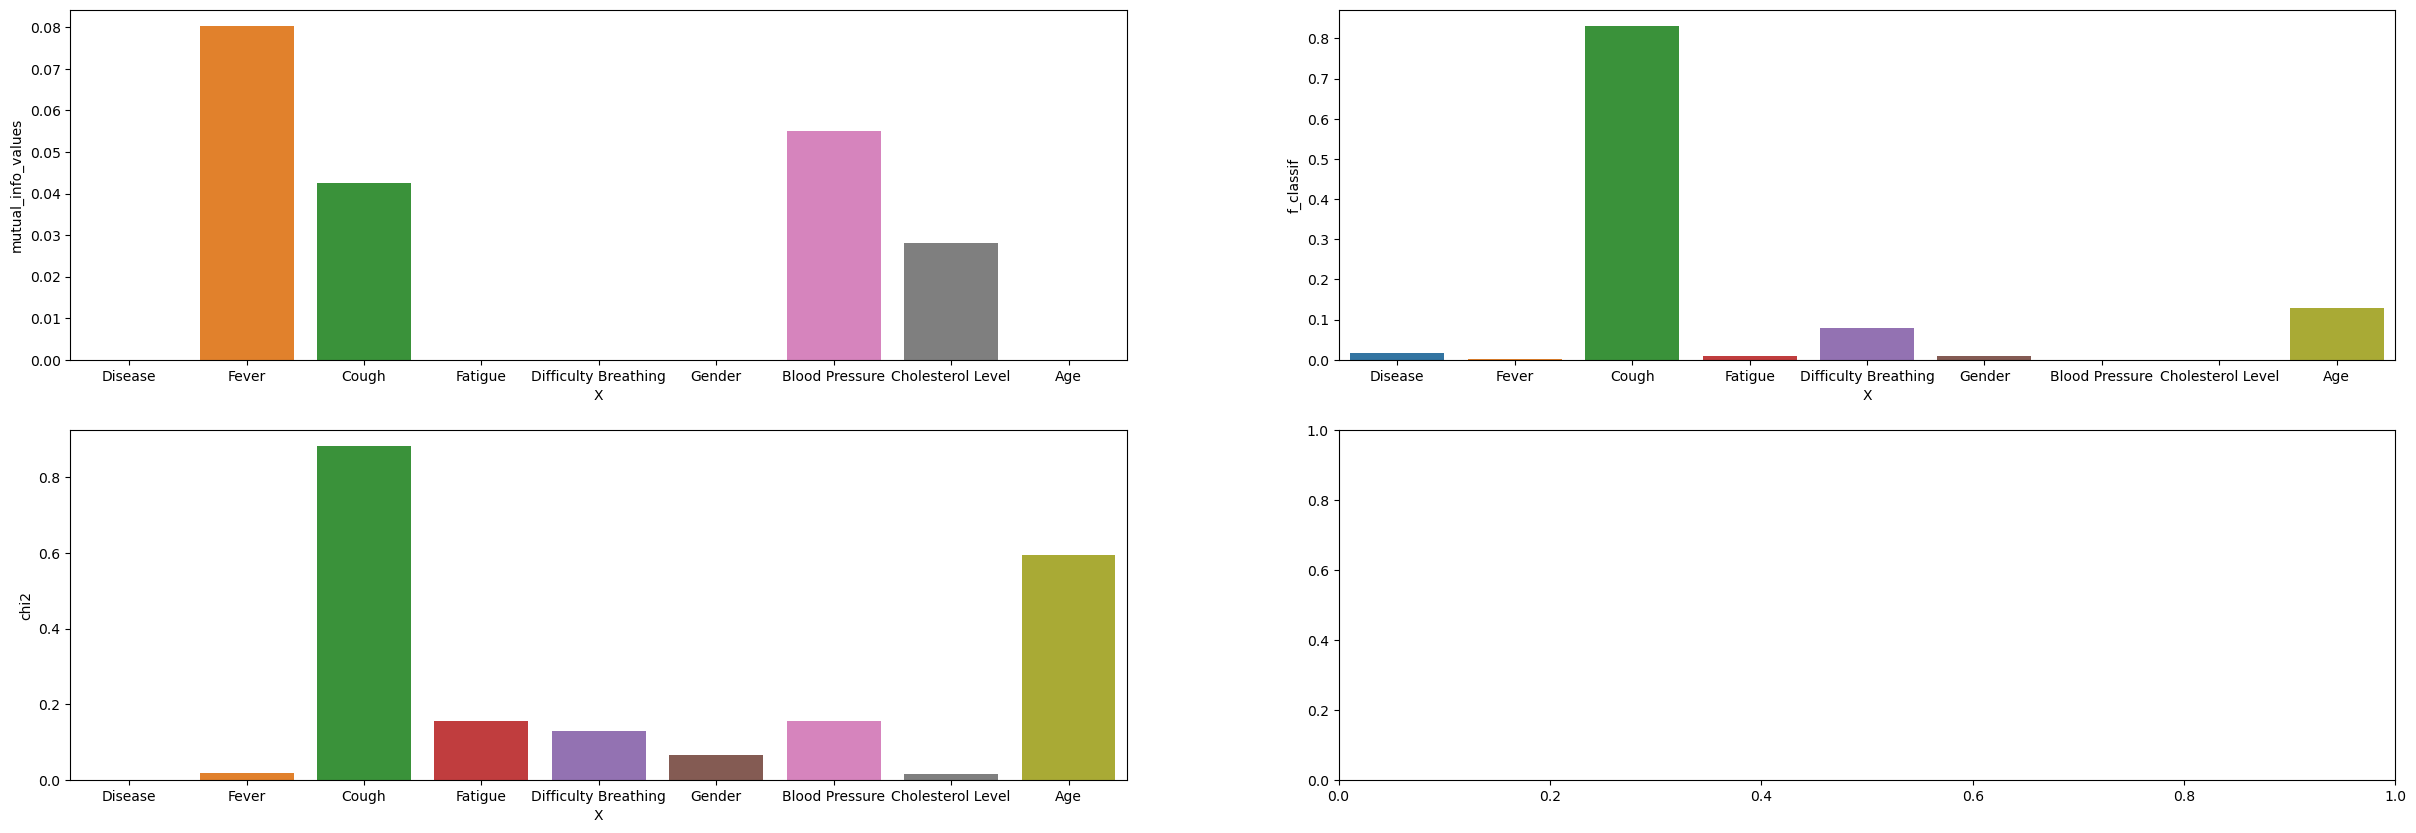

In [105]:
plt.figure(figsize=(18,20))
figure,axes=plt.subplots(2,2,figsize=(30,10))
sns.barplot(data=three_tec,x="X",y="mutual_info_values",width=0.8,ax=axes[0,0])
sns.barplot(data=three_tec,x="X",y="f_classif",width=0.8,ax=axes[0,1])
sns.barplot(data=three_tec,x="X",y="chi2",width=0.8,ax=axes[1,0])




In [44]:
import pandas as pd
from cryptography.hazmat.backends import default_backend
from cryptography.hazmat.primitives.ciphers import Cipher, algorithms, modes

def encrypt(number, key):
    # Convert the integer to bytes and then encrypt
    ciphertext = int.to_bytes(number, length=16, byteorder='big')
    
    cipher = Cipher(algorithms.AES(key), modes.CFB(b'\0' * 16), backend=default_backend())
    encryptor = cipher.encryptor()
    encrypted_bytes = encryptor.update(ciphertext) + encryptor.finalize()
    
    # Convert the encrypted bytes back to an integer
    return int.from_bytes(encrypted_bytes, byteorder='big')



# Secret key (should be kept confidential)
secret_key = b'ThisIsASecretKey'
for columns in df1.columns:
    if columns != "Result":
        df1[columns] = df1[columns].apply(lambda x: encrypt(x, secret_key))



import hashlib

def hash_function(data):
    # Using SHA-256 hash function
    sha256 = hashlib.sha256()
    sha256.update(str(data).encode())
    return int(sha256.hexdigest(), 16)

def h_encrypt(value):
    # Map the hash value to a range between 1 and 100
    return 1 + (value % 100)
df1["Result"]=df1["Result"].apply(lambda x:h_encrypt(hash_function(x)))

In [45]:
df1.head()

,Disease,Fever,Cough,Fatigue,Difficulty Breathing,Gender,Blood Pressure,Cholesterol Level,Result,Age
0,274663562500546914188836966562426705630,274663562500546914188836966562426705623,274663562500546914188836966562426705623,274663562500546914188836966562426705623,274663562500546914188836966562426705623,274663562500546914188836966562426705623,274663562500546914188836966562426705623,274663562500546914188836966562426705620,1,274663562500546914188836966562426705623
1,274663562500546914188836966562426705616,274663562500546914188836966562426705622,274663562500546914188836966562426705622,274663562500546914188836966562426705623,274663562500546914188836966562426705622,274663562500546914188836966562426705623,274663562500546914188836966562426705620,274663562500546914188836966562426705620,0,274663562500546914188836966562426705620
2,274663562500546914188836966562426705616,274663562500546914188836966562426705622,274663562500546914188836966562426705622,274663562500546914188836966562426705623,274663562500546914188836966562426705622,274663562500546914188836966562426705623,274663562500546914188836966562426705620,274663562500546914188836966562426705620,0,274663562500546914188836966562426705620
3,274663562500546914188836966562426705601,274663562500546914188836966562426705623,274663562500546914188836966562426705622,274663562500546914188836966562426705622,274663562500546914188836966562426705623,274663562500546914188836966562426705622,274663562500546914188836966562426705620,274663562500546914188836966562426705620,1,274663562500546914188836966562426705620
4,274663562500546914188836966562426705601,274663562500546914188836966562426705623,274663562500546914188836966562426705622,274663562500546914188836966562426705622,274663562500546914188836966562426705623,274663562500546914188836966562426705622,274663562500546914188836966562426705620,274663562500546914188836966562426705620,1,274663562500546914188836966562426705620


In [46]:
from sklearn.model_selection import train_test_split
x=df1[["Fever","Age","Cough","Blood Pressure"]]
y=df1["Result"]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.7)
x_test,x_valid,y_test,y_valid=train_test_split(x_test,y_test,test_size=0.8)



#### Logistic Regression

In [47]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
log_reg=LogisticRegression()
cv=KFold(n_splits=5,shuffle=False)
grid={'solver':['saga'],'C':10.0**np.arange(-3,3),'penalty':['l1','l2','elasticnet'],'l1_ratio': np.arange(0.1, 1.0, 0.1)}   
log=GridSearchCV(estimator=log_reg,param_grid=grid,cv=cv,n_jobs=-1)
log.fit(x_train,y_train)


C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02]),
                         'l1_ratio': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]),
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['saga']})

In [48]:
from sklearn.metrics import accuracy_score,f1_score,recall_score,roc_auc_score,classification_report
y_vpred=log.predict(x_valid)
print("Classification Report :\n",classification_report(y_valid,y_vpred))

Classification Report :
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        86
           1       0.56      1.00      0.72       110

    accuracy                           0.56       196
   macro avg       0.28      0.50      0.36       196
weighted avg       0.31      0.56      0.40       196



C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result)

In [49]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
class_weight={0:10,1:9}
dt=DecisionTreeClassifier(class_weight=class_weight,)
x_traint,x_testt,y_traint,y_testt=train_test_split(df1.drop(columns=["Result"],axis=1),y,test_size=0.7)
x_testt,x_validt,y_testt,y_validt=train_test_split(x_testt,y_testt,test_size=0.8)
grid_tree={'criterion':['gini', 'entropy'],'max_leaf_nodes':np.arange(2,12),'max_features':[None,'sqrt', 'log2']}
det=GridSearchCV(estimator=dt,param_grid=grid_tree,n_jobs=-1,cv=cv)
det.fit(x_traint,y_traint)


GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             estimator=DecisionTreeClassifier(class_weight={0: 10, 1: 9}),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_features': [None, 'sqrt', 'log2'],
                         'max_leaf_nodes': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11])})

In [50]:
det.best_score_
cross_val_score(det,df1.drop(columns=["Result"],axis=1),y, cv=10)

array([0.54285714, 0.54285714, 0.54285714, 0.54285714, 0.54285714,
       0.54285714, 0.51428571, 0.51428571, 0.51428571, 0.52941176])

In [51]:
print("Classification Report :\n",classification_report(y_validt,det.predict(x_validt)))
recall_score(y_validt,det.predict(x_validt))

Classification Report :
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        89
           1       0.55      1.00      0.71       107

    accuracy                           0.55       196
   macro avg       0.27      0.50      0.35       196
weighted avg       0.30      0.55      0.39       196



C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result)

1.0

In [52]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
grid_tree={'n_estimators':np.arange(50,150,10),'criterion':['gini', 'entropy'],'max_leaf_nodes':np.arange(2,12),'max_features':[None,'sqrt', 'log2']}
rnf=GridSearchCV(estimator=rf,param_grid=grid_tree,n_jobs=-1,cv=cv)
rnf.fit(x_traint,y_traint)

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_features': [None, 'sqrt', 'log2'],
                         'max_leaf_nodes': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
                         'n_estimators': array([ 50,  60,  70,  80,  90, 100, 110, 120, 130, 140])})

In [53]:
rnf.best_score_

0.5290476190476191

In [54]:
print("Classification Report :\n",classification_report(y_validt,rnf.predict(x_validt)))

Classification Report :
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        89
           1       0.55      1.00      0.71       107

    accuracy                           0.55       196
   macro avg       0.27      0.50      0.35       196
weighted avg       0.30      0.55      0.39       196



C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result)

In [65]:
from sklearn.ensemble import GradientBoostingClassifier
grd=GradientBoostingClassifier()
grid_tree={'learning_rate':np.arange(0.1,1,0.1),'n_estimators':np.arange(50,150,10),'criterion':['friedman_mse', 'squared_error'],'max_leaf_nodes':np.arange(2,12),'max_features':['sqrt', 'log2']}
grat=GridSearchCV(estimator=grd,param_grid=grid_tree,n_jobs=-1,cv=cv)
grat.fit(x_traint,y_traint)


GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'criterion': ['friedman_mse', 'squared_error'],
                         'learning_rate': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]),
                         'max_features': ['sqrt', 'log2'],
                         'max_leaf_nodes': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
                         'n_estimators': array([ 50,  60,  70,  80,  90, 100, 110, 120, 130, 140])})

In [66]:
grat.best_score_

0.5290476190476191

In [57]:
print("Classification Report :\n",classification_report(y_validt,grat.predict(x_validt)))

Classification Report :
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        89
           1       0.55      1.00      0.71       107

    accuracy                           0.55       196
   macro avg       0.27      0.50      0.35       196
weighted avg       0.30      0.55      0.39       196



C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result)

In [48]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(df1.drop(columns=["Result"],axis=1),df1["Result"],test_size=0.7)
x_test,x_valid,y_test,y_valid=train_test_split(x_test,y_test,test_size=0.8)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
log_reg=LogisticRegression()
cv=KFold(n_splits=5,shuffle=False)
grid={'solver':['saga'],'C':10.0**np.arange(-3,3),'penalty':['l1','l2','elasticnet'],'l1_ratio': np.arange(0.1, 1.0, 0.1)}   
log=GridSearchCV(estimator=log_reg,param_grid=grid,cv=cv,n_jobs=-1)
log.fit(x_train,y_train)

C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02]),
                         'l1_ratio': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]),
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['saga']})

In [49]:
log.best_score_

0.6076190476190476

In [52]:
print("Classification Report :\n",classification_report(y_valid,log.predict(x_valid)))

Classification Report :
               precision    recall  f1-score   support

           0       0.71      0.48      0.57        94
           1       0.63      0.82      0.71       102

    accuracy                           0.66       196
   macro avg       0.67      0.65      0.64       196
weighted avg       0.67      0.66      0.65       196



In [ ]:
grat.predict(x_test.iloc[1:2,:].values)

C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(


array([1])

In [ ]:
df1["Result"].unique()

array([1, 0])

In [161]:
df2=df1.copy()
df2.head()

,Disease,Fever,Cough,Fatigue,Difficulty Breathing,Gender,Blood Pressure,Cholesterol Level,Result,Age
0,8,1,1,1,1,1,1,2,1,0
1,6,0,0,1,0,1,2,2,0,1
2,6,0,0,1,0,1,2,2,0,1
3,23,1,0,0,1,0,2,2,1,1
4,23,1,0,0,1,0,2,2,1,1


### Hash 

In [162]:
import hashlib
import pandas as pd
import numpy as np

# Assuming df2 is your DataFrame

def hash_function(data):
    # Using SHA-256 hash function
    sha256 = hashlib.sha256()
    sha256.update(str(data).encode())
    return int(sha256.hexdigest(), 16)

def h_encrypt(value):
    # Map the hash value to a range between 1 and 100
    return 1 + (value % 100)

# Set a seed for reproducibility
hash_seed = 42
np.random.seed(hash_seed)

# Apply hash function with reproducible results
for column in df2.columns:
    df2[column] = df2[column].apply(lambda x: h_encrypt(hash_function(x)))


In [163]:
df2.head()

,Disease,Fever,Cough,Fatigue,Difficulty Breathing,Gender,Blood Pressure,Cholesterol Level,Result,Age
0,60,16,16,16,16,16,16,62,16,6
1,4,6,6,16,6,16,62,62,6,16
2,4,6,6,16,6,16,62,62,6,16
3,49,16,6,6,16,6,62,62,16,16
4,49,16,6,6,16,6,62,62,16,16


In [159]:
df3["Gender"]=df1["Gender"].copy()
df3["Gender"] = df3["Gender"].apply(lambda x: h_encrypt(hash_function(x)))

In [160]:
df3["Gender"].unique()

array([16,  6], dtype=int64)

In [180]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(df2.drop(columns=["Result"],axis=1),df2["Result"],test_size=0.3)
x_test,x_valid,y_test,y_valid=train_test_split(x_test,y_test,test_size=0.3)

log_reg=LogisticRegression()
cv=KFold(n_splits=5,shuffle=False)
grid={'solver':['saga','liblinear'],'C':10.0**np.arange(-3,3),'penalty':['l1','l2']}   
log=GridSearchCV(estimator=log_reg,param_grid=grid,cv=cv,n_jobs=-1)
log.fit(x_train,y_train)

print("Logistic Best score :",log.best_score_)
print("Cross Value Score :",cross_val_score(log,n_jobs=-1,cv=10,X=x_valid,y=y_valid))
print("Average Cross Value Score :",np.average(cross_val_score(log,n_jobs=-1,cv=10,X=x_valid,y=y_valid)))




Logistic Best score : 0.6557823129251701
Cross Value Score : [0.25       0.5        0.33333333 0.33333333 0.66666667 0.33333333
 0.66666667 0.66666667 0.33333333 0.66666667]
Average Cross Value Score : 0.475


In [169]:
cnt = 0
for i,j in zip(y_valid,log.predict(x_valid)):
    if i == j:
        cnt = cnt + 1
print("Percentage of correctly classified :",cnt/(len(y_valid)))
print("Percentage of not correctly classified :",1-(cnt/(len(log.predict(x_valid)))))

Percentage of correctly classified : 0.625
Percentage of not correctly classified : 0.375


In [170]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score


x_traind,x_testd,y_traind,y_testd=train_test_split(df2.drop(columns=["Result"],axis=1),df2["Result"],test_size=0.3)
x_testd,x_validd,y_testd,y_validd=train_test_split(x_testd,y_testd,test_size=0.3)


dt=DecisionTreeClassifier()
grid_tree={'criterion':['gini', 'entropy'],'max_leaf_nodes':np.arange(2,12),'max_features':[None,'sqrt', 'log2']}
det=GridSearchCV(estimator=dt,param_grid=grid_tree,n_jobs=-1,cv=cv)
det.fit(x_traind,y_traind)


print("Decision Tree Best score :",det.best_score_)
print("Cross Value Score :",cross_val_score(det,n_jobs=-1,cv=10,X=x_validd,y=y_validd))
print("Average Cross Value Score :",np.average(cross_val_score(det,n_jobs=-1,cv=10,X=x_validd,y=y_validd)))


Decision Tree Best score : 0.6759353741496599
Cross Value Score : [0.25       0.75       0.33333333 0.66666667 0.         0.66666667
 1.         0.33333333 0.66666667 0.66666667]
Average Cross Value Score : 0.5666666666666667


In [195]:
print("Classification Report :\n",classification_report(y_validd,det.predict(x_validd)))

Classification Report :
               precision    recall  f1-score   support

           6       0.69      0.73      0.71        15
          16       0.75      0.71      0.73        17

    accuracy                           0.72        32
   macro avg       0.72      0.72      0.72        32
weighted avg       0.72      0.72      0.72        32



In [196]:
joblib.dump(det,'tree.joblib')

['tree.joblib']

In [197]:
joblib.load("tree.joblib").predict([[60,16,16,16,16,16,16,62,6]])

D:\me\anaconda\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([16], dtype=int64)

In [182]:
from sklearn.ensemble import GradientBoostingClassifier

grd=GradientBoostingClassifier()


x_train,x_test,y_train,y_test=train_test_split(df2.drop(columns=["Result"],axis=1),df2["Result"],test_size=0.3)
x_test,x_valid,y_test,y_valid=train_test_split(x_test,y_test,test_size=0.3)
grid_tree={'learning_rate':np.arange(0.3,0.5,0.1),'n_estimators':[100,110,120,130],'criterion':['squared_error'],'max_leaf_nodes':[3,4,5],'max_features':['sqrt'],'n_iter_no_change':np.arange(50,200,10)}
grat=GridSearchCV(estimator=grd,param_grid=grid_tree,n_jobs=-1,cv=cv)
grat.fit(x_train,y_train)


GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'criterion': ['squared_error'],
                         'learning_rate': array([0.3, 0.4]),
                         'max_features': ['sqrt'], 'max_leaf_nodes': [3, 4, 5],
                         'n_estimators': [100, 110, 120, 130],
                         'n_iter_no_change': array([ 50,  60,  70,  80,  90, 100, 110, 120, 130, 140, 150, 160, 170,
       180, 190])})

In [183]:
print("Gradient Boosting Best score :",grat.best_score_)

Gradient Boosting Best score : 0.7660714285714285


In [184]:
y_pred=grat.predict(x_valid)

In [185]:
cnt = 0
for i,j in zip(y_pred,y_valid):
    if i == j:
        cnt = cnt + 1



In [186]:
print("Percentage of correctly classified :",cnt/(len(y_pred)))
print("Percentage of not correctly classified :",1-(cnt/(len(y_valid))))

Percentage of correctly classified : 0.71875
Percentage of not correctly classified : 0.28125


In [187]:
grat.best_params_

{'criterion': 'squared_error',
 'learning_rate': 0.3,
 'max_features': 'sqrt',
 'max_leaf_nodes': 5,
 'n_estimators': 110,
 'n_iter_no_change': 50}

In [188]:
print("Classification Report :\n",classification_report(y_valid,y_pred))

Classification Report :
               precision    recall  f1-score   support

           6       0.71      0.75      0.73        16
          16       0.73      0.69      0.71        16

    accuracy                           0.72        32
   macro avg       0.72      0.72      0.72        32
weighted avg       0.72      0.72      0.72        32



In [74]:
grat.best_estimator_.feature_importances_

array([0.32280625, 0.14319697, 0.06312341, 0.07725135, 0.0383381 ,
       0.11712582, 0.06246262, 0.12483128, 0.0508642 ])

x_train.columns[grat.best_estimator_.feature_importances_ > 0.05]

Index(['Disease', 'Fever', 'Gender', 'Blood Pressure', 'Cholesterol Level',
       'Age'],
      dtype='object')

In [189]:
cnt = 0
for i,j in zip(y_test,grat.predict(x_test)):
    if i == j:
        cnt = cnt + 1
print("Percentage of correctly classified :",cnt/(len(grat.predict(x_test))))
print("Percentage of not correctly classified :",1-(cnt/(len(y_test))))

Percentage of correctly classified : 0.7945205479452054
Percentage of not correctly classified : 0.20547945205479456


In [190]:
import joblib

In [191]:
joblib.dump(grat,'model.joblib')

['model.joblib']

In [192]:
model=joblib.load('model.joblib')

In [194]:
model.predict([[60,16,16,16,16,16,16,62,6]])

D:\me\anaconda\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(


array([16], dtype=int64)

In [1]:
import sklearn
print(sklearn.__version__)

1.3.0


In [8]:
import sklearn
from sklearn.tree import DecisionTreeClassifier

# Check scikit-learn version
print("scikit-learn version:", sklearn.__version__)

# Create an instance of DecisionTreeClassifier
dt_classifier = DecisionTreeClassifier()

# Use dir() to get a list of attributes and methods of the object
attributes_and_methods = dir(dt_classifier)

# Print the list
print(attributes_and_methods)


scikit-learn version: 1.3.0
['__abstractmethods__', '__annotations__', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__setstate__', '__sizeof__', '__sklearn_clone__', '__str__', '__subclasshook__', '__weakref__', '_abc_impl', '_build_request_for_signature', '_check_feature_names', '_check_n_features', '_compute_missing_values_in_feature_mask', '_estimator_type', '_fit', '_get_default_requests', '_get_metadata_request', '_get_param_names', '_get_tags', '_more_tags', '_parameter_constraints', '_prune_tree', '_repr_html_', '_repr_html_inner', '_repr_mimebundle_', '_support_missing_values', '_validate_X_predict', '_validate_data', '_validate_params', 'apply', 'ccp_alpha', 'class_weight', 'cost_complexity_pruning_path', 'criterion', 'decisi